In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
iris=load_iris()
X=iris.data
y=iris.target
# X.shape
# y.shape
data=pd.DataFrame(X,columns=iris.feature_names)
data["Species"]=y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


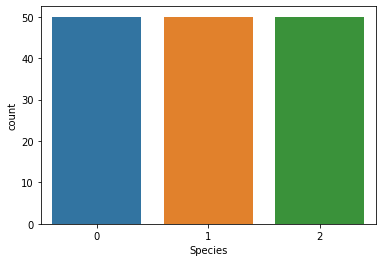

In [8]:
sns.countplot(data['Species'])

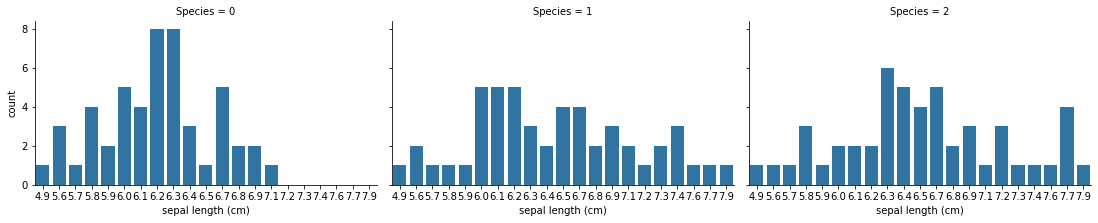

In [9]:
grid=sns.FacetGrid(data,col='Species',size=3.2,aspect=1.6)
grid.map(sns.countplot,'sepal length (cm)')

In [10]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
print(X_train.shape)
print(Y_train.shape)


(105, 4)
(105,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "LogisticRegression":LogisticRegression(random_state=42),
    "SVC":SVC(kernel='rbf',gamma=0.5,probability=True),
    "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=1,random_state=42),
    "GradientBoostingClassifier":GradientBoostingClassifier(max_depth=1,random_state=42,n_estimators=3,learning_rate=1.0)
}

In [14]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

def loss(y_true,y_pred,retur=False):
  pre=precision_score(y_true,y_pred,average='macro')
  rec=recall_score(y_true,y_pred,average='macro')
  accuracy=accuracy_score(y_true,y_pred)
  if retur:
    return pre,rec,accuracy
  else:
    print(pre)
    print(rec)
    print(accuracy)  

In [15]:
def train_and_eval(models,X,y):
  for name,model in models.items():
    print(name,':')
    model.fit(X,y)
    loss(y,model.predict(X))
    print('*' * 30)


In [16]:
train_and_eval(models,X_train,Y_train)

LogisticRegression :
0.964835164835165
0.963963963963964
0.9619047619047619
******************************
SVC :
0.9912280701754387
0.990990990990991
0.9904761904761905
******************************
DecisionTreeClassifier :
0.5
0.6666666666666666
0.6476190476190476
******************************
GradientBoostingClassifier :
0.964835164835165
0.963963963963964
0.9619047619047619
******************************


In [21]:
gra = GradientBoostingClassifier(max_depth=1,random_state=42,n_estimators=3,learning_rate=1.0)
gra.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=3,
                           random_state=42)

In [22]:
gra.predict([[1.2,2.3,4.5,2.3]])

array([1])

In [25]:
import joblib
joblib.dump(gra,'model.pkl')
grad=joblib.load('model.pkl')